<a href="https://colab.research.google.com/github/nehaansiddiqua/ML_workshop/blob/main/Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train MSE: 1.0385703243341047, Test MSE: 0.8111606286982094


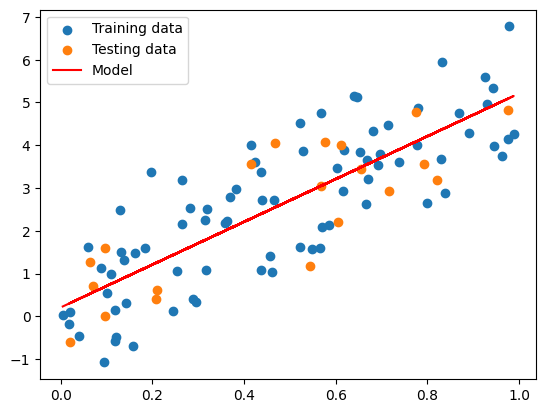

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
#seed function here helps us get same random values every time we run the code
np.random.seed(0)
X = np.random.rand(100, 1)
y = 5 * X.squeeze() + np.random.randn(100)

#The squeeze() function in NumPy is used to remove single-dimensional entries
#from the shape of an array. It returns a new array with all the dimensions of
#length 1 removed.

#Original array:
#[[1]
# [2]
# [3]]
#Shape of original array: (3, 1)

#Squeezed array:
#1 2 3]
#Shape of squeezed array: (3,)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")

# Plot the data and the model predictions
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Testing data')
plt.plot(X, model.predict(X), color='red', label='Model')
plt.legend()
plt.show()

#legend is used to display blue dots are for training and orange for testing

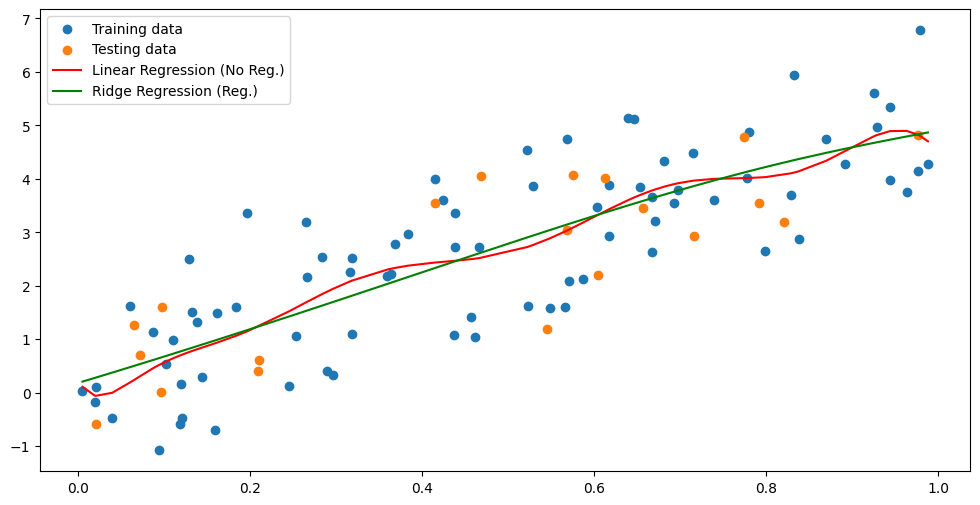

Linear Regression (No Reg.) - Train MSE: 1.0030675860688223, Test MSE: 0.7868889685020344
Ridge Regression (Reg.) - Train MSE: 1.0282268140173865, Test MSE: 0.8065328247009159


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate some data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 5 * X.squeeze() + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a polynomial regression model
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Linear Regression (No Regularization)
model_lr = LinearRegression()
model_lr.fit(X_poly_train, y_train)
y_pred_train_lr = model_lr.predict(X_poly_train)
y_pred_test_lr = model_lr.predict(X_poly_test)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)

# Ridge Regression (Regularization)
alpha = 0.1
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(X_poly_train, y_train)
y_pred_train_ridge = model_ridge.predict(X_poly_train)
y_pred_test_ridge = model_ridge.predict(X_poly_test)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

# Plot the data and the model predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Testing data')
plt.plot(np.sort(X_train, axis=0), model_lr.predict(poly_features.transform(np.sort(X_train, axis=0))), label='Linear Regression (No Reg.)', color='red')
plt.plot(np.sort(X_train, axis=0), model_ridge.predict(poly_features.transform(np.sort(X_train, axis=0))), label='Ridge Regression (Reg.)', color='green')
plt.legend()
plt.show()

# Print MSE for both models
print(f"Linear Regression (No Reg.) - Train MSE: {mse_train_lr}, Test MSE: {mse_test_lr}")
print(f"Ridge Regression (Reg.) - Train MSE: {mse_train_ridge}, Test MSE: {mse_test_ridge}")
